In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from scipy import signal
from tqdm import tqdm

First things first, we're going to be using natural units for this, and we want to create a wave function that looks kinda cool, but satisfys our boundary conditions. The function must equal zero at the very start and very end of our square well. I'm going to make this well 100 units wide

I looked around a little and thought sawtooth functions looked pretty cool, we'll have to wait and see just difficult it is to make them from schrodingers equation. The function "sawtooth" takes f as a parameter, and creates a sawtooth wave within our box with a wavelngth of 100/f, and with the phase of the standard sawtooth wave shifted such that the function equals zero at x = 0 and x = 100

In [2]:
def sawtooth(f):
    sawtooth = signal.sawtooth(np.pi+2*np.pi*f*np.linspace(0,1,100)) #Creating sawtooth function
    return (sawtooth/np.linalg.norm(sawtooth)) #Normalizing sawtooth and returning it


Let's test it with a frequency of 2:

Now plotting the modulus squared:

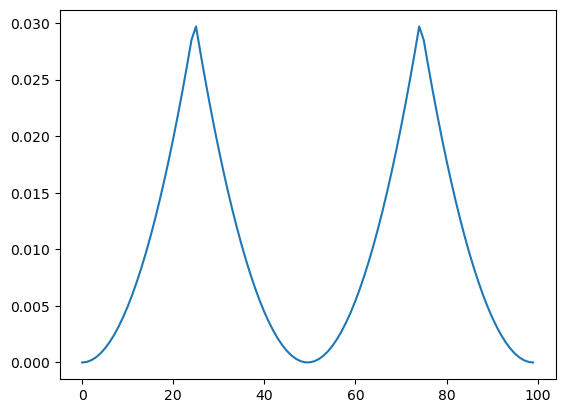

In [3]:
sawbox = sawtooth(2)
plt.plot(np.absolute(sawbox)**2)
plt.show()

Next, lets create a function to get psiN a function of x:

In [4]:
def psiN(n):
    box = list()
    for i in range(100):
        box.append(np.sqrt(2/100)*np.sin(np.pi*n*i/100))
    return(np.array(box))

Now we can calculate the time independent psi inside our box for any n. Let's test it 

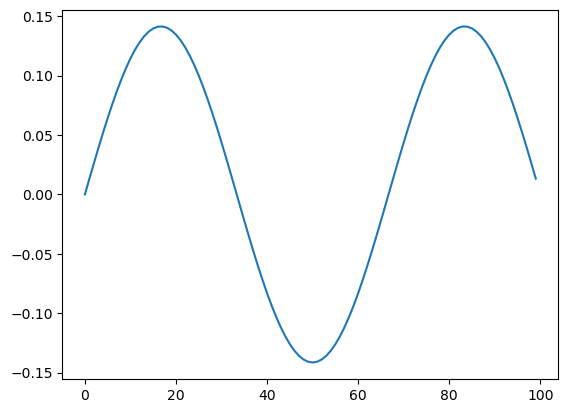

In [5]:
psi3 = psiN(3)
plt.plot(psi3)
plt.show()

Looks like the third energy state to me!

Let's calculate cN

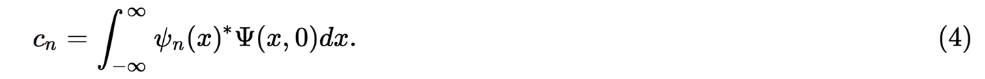


Now, this equation involves an integral, and we could do that math, but instead I'm going to use Eulers method to aproximate the sum. Eulers method involves many small steps being summed, instead of the actual analytical solution. With small enough steps, the information lost between each step becomes negligable. This is why I've chosen Numpy arrays with so many entries, each of this entires serves as a new step for our Euler sum.


In [6]:
def cN(n, psiZero):
    return(np.sum(psiN(n)*psiZero))

That was suprisingly easy! It turns out the first half of our equation is actualy psiN from earlier, so we can simply call the function, multiply the two arrays, and sum them. Lets test it:

In [7]:
print(cN(2, sawbox))

-0.015826402367239686


That sure is a number! Now that we have all of the components, let's create a function to combine them and output our wave function as time changes.

In [8]:
def psiXZero(nmax, intitialbox):
    box = list()
    for x in tqdm(range(100)):
        sum = 0
        for n in range(nmax):
            cn = cN(n, intitialbox)
            psin = psiN(n)[x]
            sum += cn*psin
        box.append(sum)
    return(box)

Lets test it with an n of 20:

100%|██████████| 100/100 [00:00<00:00, 113.09it/s]


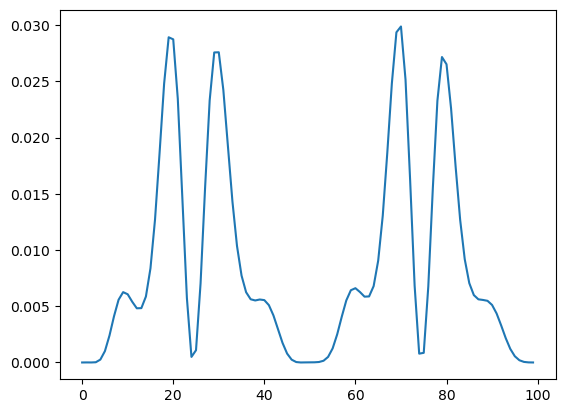

In [9]:
plt.plot(np.absolute(psiXZero(20, sawbox))**2)
plt.show()

Hey that looks kinda like our initial function! Now let's try an n of 100 to get it to look closer to the real thing:

100%|██████████| 100/100 [00:04<00:00, 22.72it/s]


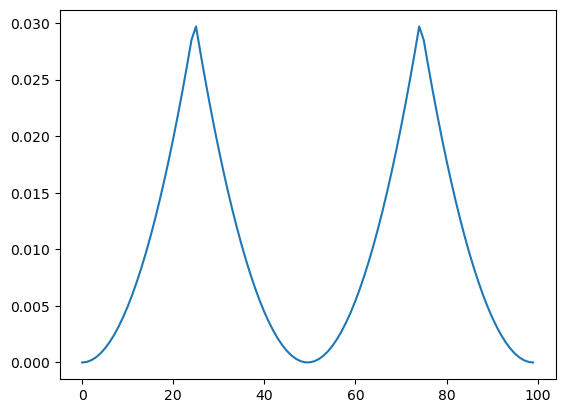

In [10]:
plt.plot(np.absolute(psiXZero(100, sawbox))**2)
plt.show()

Now that really looks like it! Took four seconds to run that one frame on my laptop, but whos counting. Now let's make a time dependent version:

In [11]:
def En(n):
    return((n**2)*(np.pi**2)*(1/2*100**2))

def psiXT(nmax, intitialbox, t):
    box = list()
    for x in tqdm(range(100)): #Doing one X position at time, isntead of function
        sum = 0
        for n in range(nmax):
            cn = cN(n, intitialbox)
            psin = psiN(n)[x]
            sum += cn * psin * np.exp(-1j*En(n)*t)
        box.append(sum)
    return(box)

100%|██████████| 100/100 [00:04<00:00, 22.86it/s]


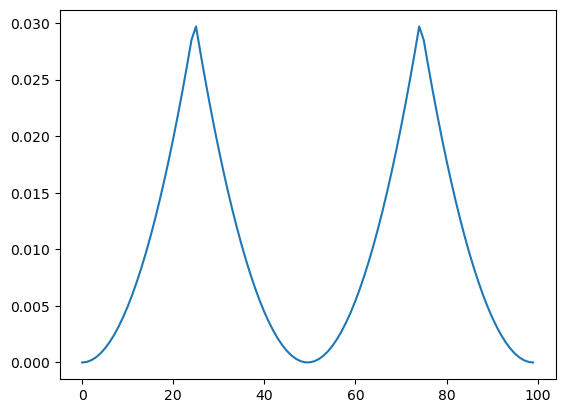

In [12]:
plt.plot(np.absolute(psiXT(100, sawbox, 0))**2)
plt.show()

That looks like our last two plots! 
Now let's calculate our T

In [13]:
T = (4*100**2)/np.pi
print(T)

12732.395447351628


Now let's try plotting it at T:

100%|██████████| 100/100 [00:04<00:00, 23.32it/s]


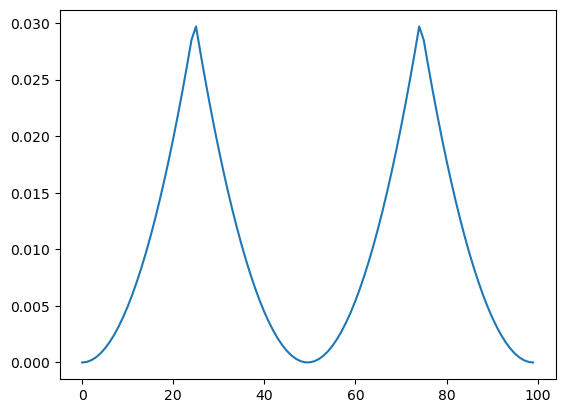

In [14]:
plt.plot(np.absolute(psiXT(100, sawbox, T))**2)
plt.show()

Woah thats cool, it's exactly back where it started.
Let's try T/2

100%|██████████| 100/100 [00:04<00:00, 23.30it/s]


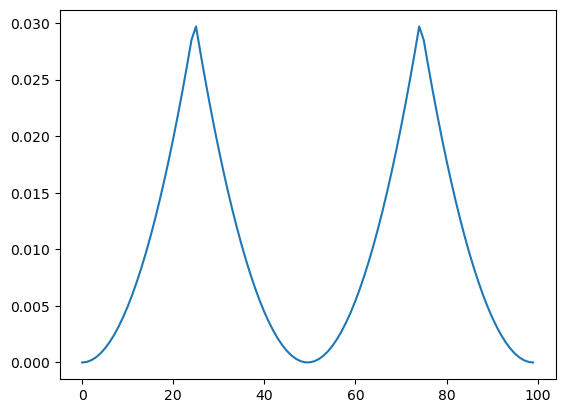

In [15]:
plt.plot(np.absolute(psiXT(100, sawbox, T/2))**2)
plt.show()

Interestingly, it's again just like the past plots, lets try T/3, which should be halfway the last two plots.

100%|██████████| 100/100 [00:04<00:00, 23.07it/s]


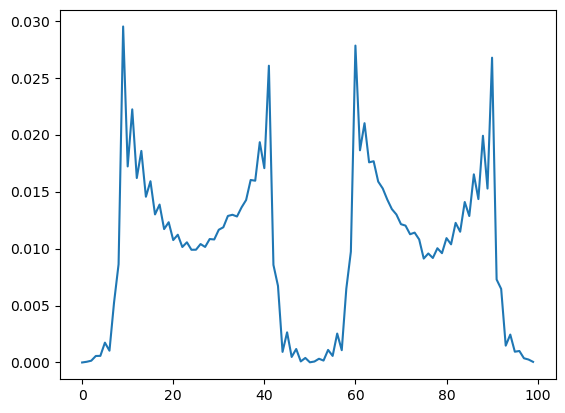

In [16]:
plt.plot(np.absolute(psiXT(100, sawbox, T/3))**2)
plt.show()

Cool, this we can see the waveform "spread" out in both directions, halfway to bouncing off the sides of the box and itself. Now let's turn this into an animation:

MovieWriter ffmpeg unavailable; using Pillow instead.
100%|██████████| 100/100 [00:04<00:00, 22.79it/s]


ValueError: unknown file extension: .mp4

100%|██████████| 100/100 [00:04<00:00, 22.01it/s]


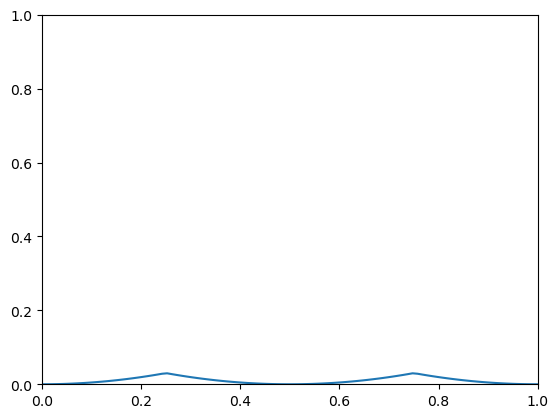

In [17]:
frames = list()

fig = plt.figure()
axis = plt.axes(xlim =(0, 1), ylim = (0, 1)) 
line, = axis.plot([], []) 

def init(): 
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 1, 100)
    y = np.absolute(psiXT(100, sawbox, i*(T/140000000000)))**2
    line.set_data(x, y)

    return line,

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=200)
 

ani.save('QMEvolution.mp4', 
          writer = 'ffmpeg', fps = 10)

plt.show()

Unfortunately Jupyter Notebooks doesn't seem to support matplotlib's animation backend, the final animation is viewable in Animation.py however.